/var/folders/cv/khdc4zcd09j8jq7qcqhlct8m0000gn/T/ipykernel_10889/1147118537.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_restaurant_data['UyeKurulusTabelaAdı'] = top_restaurant_data['UyeKurulusTabelaAdı'].astype('category')
/var/folders/cv/khdc4zcd09j8jq7qcqhlct8m0000gn/T/ipykernel_10889/1147118537.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_restaurant_data, x='UyeKurulusTabelaAdı', y='IslemTutarı', inner='quartile', palette='muted')


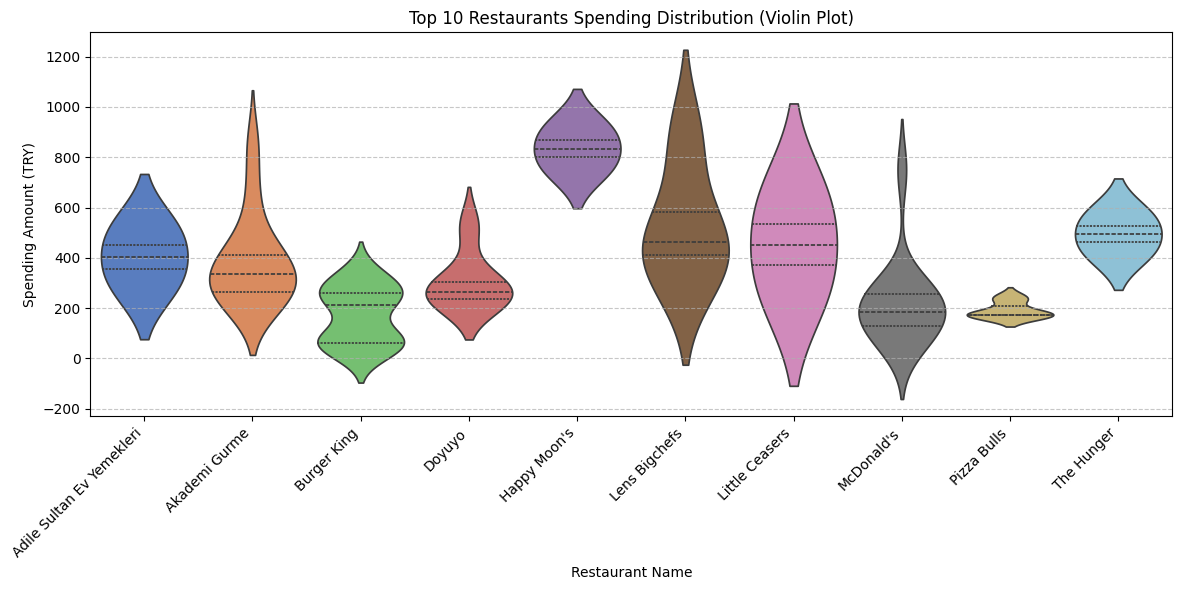

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleme (doğru yolu sağlayın)
file_path = 'Emre_YONTUCU_ticket.csv'
data = pd.read_csv(file_path)

# Tarih sütununu datetime formatına çevirme
data['IslemZamanı'] = pd.to_datetime(data['IslemZamanı'], errors='coerce')

# Harcama sütununu sayısal formata çevirme
data['IslemTutarı'] = data['IslemTutarı'].str.replace(',', '.').astype(float)

# Restoran bazlı toplam harcamaları hesaplama
top_restaurants = data.groupby('UyeKurulusTabelaAdı')['IslemTutarı'].sum().sort_values(ascending=False).head(10)

# Sadece ilk 10 restoranı filtreleme
top_restaurant_data = data[data['UyeKurulusTabelaAdı'].isin(top_restaurants.index)]

# Restoran isimlerini kategori olarak ayarlama
top_restaurant_data['UyeKurulusTabelaAdı'] = top_restaurant_data['UyeKurulusTabelaAdı'].astype('category')

# Violin plot ile görselleştirme
plt.figure(figsize=(12, 6))
sns.violinplot(data=top_restaurant_data, x='UyeKurulusTabelaAdı', y='IslemTutarı', inner='quartile', palette='muted')
plt.title('Top 10 Restaurants Spending Distribution (Violin Plot)')
plt.xlabel('Restaurant Name')
plt.ylabel('Spending Amount (TRY)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
